In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
Obesity = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
Obesity.loc[Obesity['Gender'] == 'Female','Gender'] = 0
Obesity.loc[Obesity['Gender'] == 'Male','Gender'] = 1
Obesity.loc[Obesity['family_history_with_overweight'] == 'yes','family_history_with_overweight'] = 1
Obesity.loc[Obesity['family_history_with_overweight'] == 'no','family_history_with_overweight'] = 0
Obesity.loc[Obesity['FAVC'] == 'yes','FAVC'] = 1
Obesity.loc[Obesity['FAVC'] == 'no','FAVC'] = 0
Obesity.loc[Obesity['SMOKE'] == 'yes','SMOKE'] = 1
Obesity.loc[Obesity['SMOKE'] == 'no','SMOKE'] = 0
Obesity.loc[Obesity['SCC'] == 'yes','SCC'] = 1
Obesity.loc[Obesity['SCC'] == 'no','SCC'] = 0
Obesity.loc[Obesity['NObeyesdad'] == 'Insufficient_Weight','NObeyesdad'] = 0
Obesity.loc[Obesity['NObeyesdad'] == 'Normal_Weight','NObeyesdad'] = 0
Obesity.loc[Obesity['NObeyesdad'] == 'Overweight_Level_I','NObeyesdad'] = 0
Obesity.loc[Obesity['NObeyesdad'] == 'Overweight_Level_II','NObeyesdad'] = 0
Obesity.loc[Obesity['NObeyesdad'] == 'Obesity_Type_I','NObeyesdad'] = 1
Obesity.loc[Obesity['NObeyesdad'] == 'Obesity_Type_II','NObeyesdad'] = 1
Obesity.loc[Obesity['NObeyesdad'] == 'Obesity_Type_III','NObeyesdad'] = 1
Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,0


In [4]:
Obesity_CAEC = pd.get_dummies(Obesity['CAEC'])
Obesity_CAEC.columns = ['CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no']
Obesity_CALC = pd.get_dummies(Obesity['CALC'])
Obesity_CALC.columns = ['CALC_Always','CALC_Frequently','CALC_Sometimes','CALC_no']
Obesity_MTRANS = pd.get_dummies(Obesity['MTRANS'])
Obesity_MTRANS.columns = ['MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']

In [5]:
Obesity1 = Obesity.drop(columns=['CAEC','CALC','MTRANS','NObeyesdad'])
Obesity1 = pd.concat([Obesity1,Obesity_CAEC,Obesity_CALC,Obesity_MTRANS,Obesity['NObeyesdad']],axis=1)
Obesity1.drop(axis=1,columns=['CALC_Always'], inplace=True) #'CALC_Always'的标准差过小，剔除
Obesity1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,1,0,0,0,1,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,1,0,0,0,0,1,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,0,0,0,1,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,1,0,0,0,0,0,0,1,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,1,0,0,0,0,1,0,0


In [6]:
Obesity_data = np.array(Obesity1)
print(Obesity_data.shape)

(2111, 26)


In [7]:
X = Obesity_data[:,0:-1]
y = Obesity_data[:,-1].astype('int')
print(X.shape)
print(y.shape)

(2111, 25)
(2111,)


IndexError: index 25 is out of bounds for axis 1 with size 25

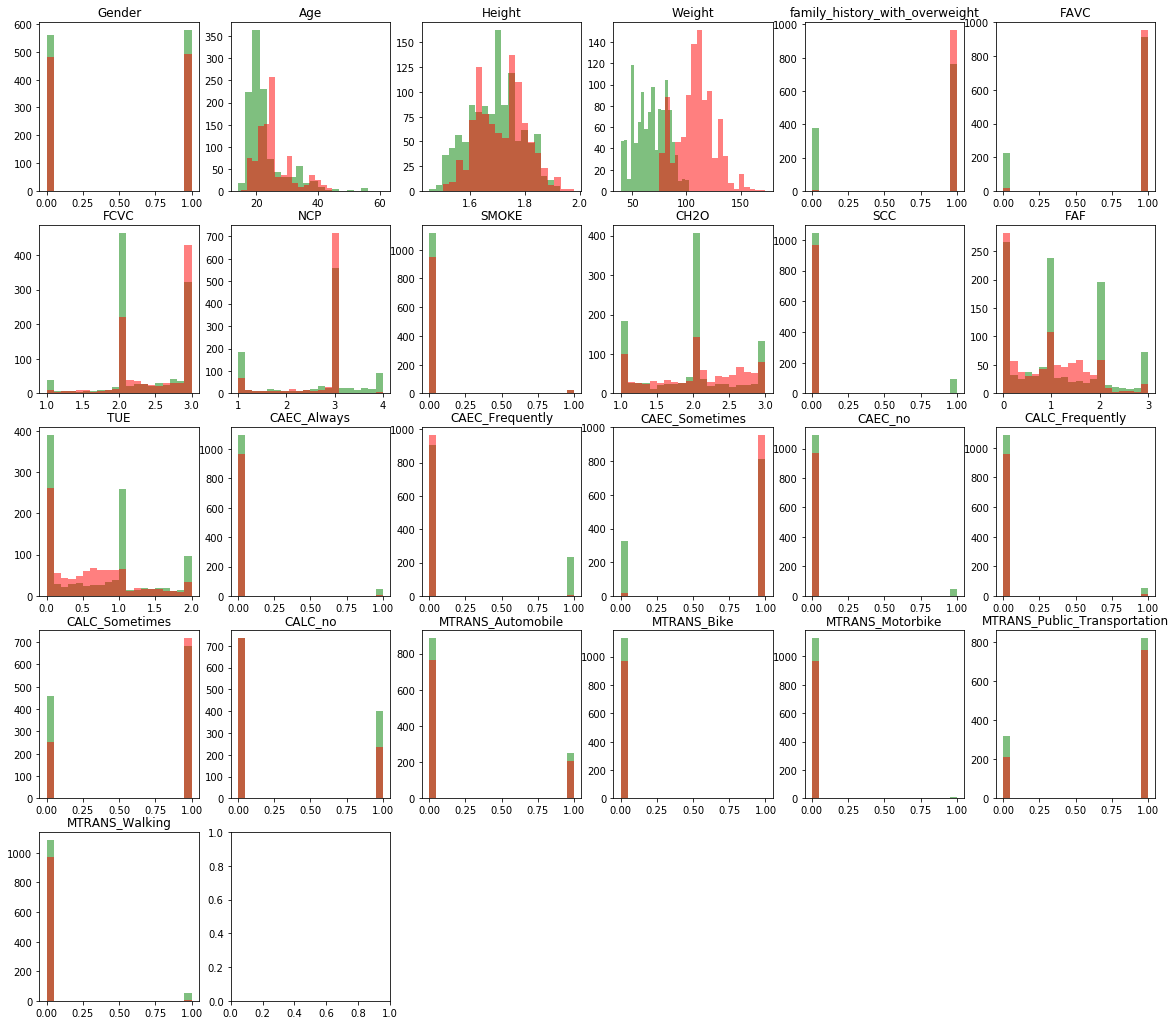

In [16]:
Obesity_x=Obesity_data[:,:-1]
Obesity_x.shape
Obesity_y=Obesity_data[:,-1]
Obesity_y.shape
plt.figure(figsize=(20,18))
for ii,name in zip(range(len(Obesity1.columns)),Obesity1.columns):
    plt.subplot(5,6,ii+1)
    plt.hist(Obesity_x[Obesity_y[:]==0,ii],20,color="green",alpha=0.5)
    plt.hist(Obesity_x[Obesity_y[:]==1,ii],20,color="red",alpha=0.5)
    plt.title(name)
plt.subplots_adjust(bottom=1,top=11)
plt.show()

In [130]:
Obesity1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21.00,1.62,64.00,1,0,2.00,3.00,0,2.00,0,0.00,1.00,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,21.00,1.52,56.00,1,0,3.00,3.00,1,3.00,1,3.00,0.00,0,0,1,0,0,1,0,0,0,0,1,0,0
2,1,23.00,1.80,77.00,1,0,2.00,3.00,0,2.00,0,2.00,1.00,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,27.00,1.80,87.00,0,0,3.00,3.00,0,2.00,0,2.00,0.00,0,0,1,0,1,0,0,0,0,0,0,1,0
4,1,22.00,1.78,89.80,0,0,2.00,1.00,0,2.00,0,0.00,0.00,0,0,1,0,0,1,0,0,0,0,1,0,0


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [132]:
train_list = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','SMOKE','CH20',
              'SCC','FAF','TUE','CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no','CALC_Frequently','CALC_Sometimes','CALC_no','MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']
X_tr = pd.DataFrame(X_train,columns = train_list )
X_Lp_train = X_tr.copy()
X_Lp_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH20,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,23.00,1.72,66.00,1,1,2.00,3.00,0,2.00,0,0.00,1.00,0,0,1,0,0,1,0,0,0,0,0,1
1,0,18.37,1.75,133.67,1,1,3.00,3.00,0,2.90,0,1.51,0.63,0,0,1,0,0,1,0,0,0,0,1,0
2,1,21.00,1.70,65.00,1,1,2.00,3.00,0,1.00,0,1.00,1.00,0,1,0,0,0,0,1,0,0,0,1,0
3,1,18.00,1.75,85.00,1,0,2.00,3.00,0,3.00,0,1.00,0.00,0,0,1,0,0,1,0,0,0,0,1,0
4,0,19.74,1.70,49.98,0,1,1.20,3.53,0,1.13,0,2.00,1.00,0,0,1,0,0,1,0,0,0,0,1,0


In [133]:
for i in train_list:
    X_tr[i] = (X_tr[i] - np.mean(X_tr[i]))/np.std(X_tr[i])#标准化训练集
X_tr.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH20,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.99,-0.22,0.20,-0.81,0.46,0.37,-0.79,0.42,-0.15,-0.03,-0.22,-1.17,0.57,-0.15,-0.37,0.45,-0.16,-0.19,0.72,-0.67,-0.52,-0.05,-0.08,-1.76,6.21
1,-1.01,-0.94,0.47,1.82,0.46,0.37,1.08,0.42,-0.15,1.41,-0.22,0.59,-0.05,-0.15,-0.37,0.45,-0.16,-0.19,0.72,-0.67,-0.52,-0.05,-0.08,0.57,-0.16
2,0.99,-0.53,-0.02,-0.84,0.46,0.37,-0.79,0.42,-0.15,-1.63,-0.22,-0.00,0.57,-0.15,2.72,-2.24,-0.16,-0.19,-1.39,1.50,-0.52,-0.05,-0.08,0.57,-0.16
3,0.99,-1.00,0.52,-0.07,0.46,-2.72,-0.79,0.42,-0.15,1.57,-0.22,-0.00,-1.08,-0.15,-0.37,0.45,-0.16,-0.19,0.72,-0.67,-0.52,-0.05,-0.08,0.57,-0.16
4,-1.01,-0.73,-0.02,-1.43,-2.17,0.37,-2.28,1.10,-0.15,-1.42,-0.22,1.16,0.57,-0.15,-0.37,0.45,-0.16,-0.19,0.72,-0.67,-0.52,-0.05,-0.08,0.57,-0.16


In [134]:
X_te = pd.DataFrame(X_test,columns = train_list)
X_Lp_test = X_te.copy()
for i in train_list:
    X_te[i] = (X_te[i] - np.mean(X_te[i]))/np.std(X_te[i])#标准化测试集
X_te.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH20,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-1.01,0.41,-0.44,-0.27,0.50,0.34,-0.77,-0.19,-0.12,0.05,-0.21,-1.24,-0.38,-0.18,-0.34,0.43,-0.16,5.48,-1.45,-0.64,-0.55,-0.08,-0.04,0.61,-0.18
1,0.99,-0.01,-1.03,0.51,0.50,0.34,1.11,-1.77,-0.12,-1.69,-0.21,0.19,1.18,-0.18,-0.34,0.43,-0.16,-0.18,-1.45,1.57,-0.55,-0.08,-0.04,0.61,-0.18
2,0.99,0.06,-0.51,0.19,0.50,0.34,-1.72,0.35,-0.12,-1.68,-0.21,-0.13,0.11,-0.18,-0.34,0.43,-0.16,-0.18,-1.45,1.57,1.81,-0.08,-0.04,-1.63,-0.18
3,-1.01,-0.36,0.62,1.90,0.50,0.34,1.11,0.35,-0.12,1.17,-0.21,1.02,0.36,-0.18,-0.34,0.43,-0.16,-0.18,0.69,-0.64,-0.55,-0.08,-0.04,0.61,-0.18
4,-1.01,-0.38,0.95,1.90,0.50,0.34,1.11,0.35,-0.12,1.50,-0.21,0.57,0.42,-0.18,-0.34,0.43,-0.16,-0.18,0.69,-0.64,-0.55,-0.08,-0.04,0.61,-0.18


In [135]:
list_in_1 = []
list_in_2 = []
n = 0
for i in range(25):
    list_in_1.append(np.array(X_tr[train_list[n]]).reshape(-1,1))
    list_in_2.append(np.array(X_te[train_list[n]]).reshape(-1,1))
    n = n + 1
X1_train = np.hstack(tuple(list_in_1))#这个函数的作用是把所有的变量也就是Xi合起来形成一个变量矩阵
X1_test = np.hstack(tuple(list_in_2))
X1_train.shape

(1583, 25)

In [136]:
X1_trainval = X1_train
y_trainval = y_train
X1_trainval.shape,y_trainval.shape

((1583, 25), (1583,))

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
cross_val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X1_trainval, y_trainval, cv=6)
    cross_val_scores.append(np.mean(scores))

In [138]:
print("Best cross-validation accuracy: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]#np.argmax返回一个np.array最大值的索引，这里也就是最好的K
print("Best number of neighbors: {}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X1_trainval, y_trainval)
print("Test-set score: {:.3f}".format(knn.score(X1_test, y_test)))

Best cross-validation accuracy: 0.939
Best number of neighbors: 1
Test-set score: 0.960


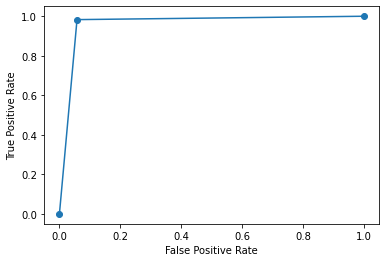

0.9625414268271412

In [139]:
y1r_pred = knn.predict(X1_test)#knn.predict 这个func 返回的是分类的值 比如 取值范围只有0或1，不连续
ylr_pred_prob =  knn.predict_proba(X1_test)#knn.predict_proba 这个func 返回的是连续的值 取值范围0到1 所有的值
#Calculate out-of-sample AUC
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), ylr_pred_prob[:,1])
#false positive rate，true positive rate，分类阈值
#Draw the ROC curve
plt.plot(fpr,tpr,marker = 'o')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc(fpr, tpr)

In [140]:
from sklearn.metrics import zero_one_loss
zol_knn = zero_one_loss(y1r_pred,y_test)#很直观  0-1loss 的func
zol_knn

0.03977272727272729

L1 正则化

In [141]:
import numpy as np
import pandas as pd
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)
pd.options.display.float_format = '{:,.2f}'.format

In [142]:
X_Lp_train.head() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH20,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,23.00,1.72,66.00,1,1,2.00,3.00,0,2.00,0,0.00,1.00,0,0,1,0,0,1,0,0,0,0,0,1
1,0,18.37,1.75,133.67,1,1,3.00,3.00,0,2.90,0,1.51,0.63,0,0,1,0,0,1,0,0,0,0,1,0
2,1,21.00,1.70,65.00,1,1,2.00,3.00,0,1.00,0,1.00,1.00,0,1,0,0,0,0,1,0,0,0,1,0
3,1,18.00,1.75,85.00,1,0,2.00,3.00,0,3.00,0,1.00,0.00,0,0,1,0,0,1,0,0,0,0,1,0
4,0,19.74,1.70,49.98,0,1,1.20,3.53,0,1.13,0,2.00,1.00,0,0,1,0,0,1,0,0,0,0,1,0


In [143]:
X_Lp_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH20,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,26.60,1.66,78.57,1,1,2.00,2.60,0,2.00,0,0.00,0.43,0,0,1,0,1,0,0,0,0,0,1,0
1,1,24.00,1.61,99.96,1,1,3.00,1.42,0,1.00,0,1.19,1.38,0,0,1,0,0,0,1,0,0,0,1,0
2,1,24.47,1.65,91.20,1,1,1.49,3.00,0,1.01,0,0.92,0.73,0,0,1,0,0,0,1,1,0,0,0,0
3,0,21.84,1.76,137.79,1,1,3.00,3.00,0,2.64,0,1.88,0.89,0,0,1,0,0,1,0,0,0,0,1,0
4,0,21.70,1.79,137.77,1,1,3.00,3.00,0,2.83,0,1.51,0.92,0,0,1,0,0,1,0,0,0,0,1,0


In [144]:
list_in_3 = []
list_in_4 = []
n = 0
for i in range(25):
    list_in_3.append(np.array(X_Lp_train[train_list[n]]).reshape(-1,1))
    list_in_4.append(np.array(X_Lp_test[train_list[n]]).reshape(-1,1))
    n = n + 1
X_Lp_train = np.hstack(tuple(list_in_3))#这个函数的作用是把所有的变量也就是Xi合起来形成一个变量矩阵
X_Lp_test = np.hstack(tuple(list_in_4))
X_Lp_train.shape

(1583, 25)

In [145]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 0, 13)}
model_lasso = linear_model.LogisticRegression(penalty = 'l1',max_iter = 5000,solver = 'liblinear')
model1 = GridSearchCV(model_lasso,param_grid,cv = 10)
model1.fit(X_Lp_train,y_train)
print(model1.best_params_)
ylr_pred = model1.predict(X_Lp_test)
ylr_pred_prob =  model1.predict_proba(X_Lp_test)

{'C': 0.31622776601683794}


In [146]:
from sklearn.metrics import confusion_matrix

CM_lr = confusion_matrix(y_test, ylr_pred)#混淆矩阵 ，没要求可以不敲这个代码
print(CM_lr)

[[289   5]
 [  2 232]]


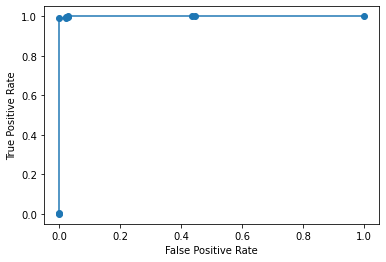

0.9997964997964999

In [147]:
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), ylr_pred_prob[:,1])
plt.plot(fpr,tpr,marker = 'o')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc(fpr, tpr)

L2 正则化

In [148]:
model_ridge = linear_model.LogisticRegression(penalty = 'l2',max_iter = 5000)
model2 = GridSearchCV(model_ridge,param_grid,cv = 10)
model2.fit(X_Lp_train,y_train)
print(model2.best_params_)
ylr_pred = model2.predict(X_Lp_test)
ylr_pred_prob =  model2.predict_proba(X_Lp_test)

{'C': 1.0}


In [149]:
CM_lr = confusion_matrix(y_test, ylr_pred)
print(CM_lr)

[[281  13]
 [  5 229]]


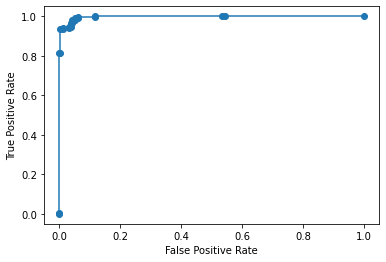

0.996685853828711

In [150]:
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), ylr_pred_prob[:,1])
plt.plot(fpr,tpr,marker = 'o')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc(fpr, tpr)